In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/')
from methods import * 
from GHA import GHA

In [3]:
ds = 128
n_input = 2
n_features = 2
data=np.random.normal(loc=6, scale=1, size=(ds,n_input))
data[...,1] = 2*data[...,0] + data[...,1]

#data=np.concatenate([data,np.random.normal(loc=(10,4),scale=1,size=(ds,n_input))])

In [4]:
lr=1
loc=0.1
scale=0.0
lr_incr=1
gha = GHA(n_input,n_features)

In [5]:
U,S,V = svd(data.copy())
print("Sangers initial kernel: \n", np.around(gha._W, decimals=2))
print("svd_U: \n", np.around(U, decimals=2))
print("svd_S: \n", np.around(S, decimals=2))
print("svd_V: \n", np.around(V, decimals=2))
print("svd_V/S \n", np.around(U/S, decimals=2))

Sangers initial kernel: 
 [[-0.04  0.04]
 [ 0.07  0.09]]
svd_U: 
 [[-0.38 -0.93]
 [-0.93  0.38]]
svd_S: 
 [6.39 0.13]
svd_V: 
 [[-0.38 -0.93]
 [-0.93  0.38]]
svd_V/S 
 [[-0.06 -7.04]
 [-0.14  2.85]]


In [6]:
mb_size = 128
epochs = 10000

for i in tqdm.trange(epochs):
    for j in range(int(data.shape[0] / mb_size)):
        mb = data[j * mb_size : (j + 1) * mb_size]
        gha.train_step(mb)

print("Sangers trained kernel: \n", np.around(gha._W, decimals=2))

  3%|▎         | 266/10000 [00:00<00:07, 1385.92it/s]

[[5.12471615e-05 1.44345265e-04]
 [2.64276957e-04 6.46719297e-04]]
[[5.11040630e-05 1.43811929e-04]
 [2.63241070e-04 6.44262979e-04]]
[[5.09624902e-05 1.43285847e-04]
 [2.62218632e-04 6.41837975e-04]]
[[5.08224155e-05 1.42766848e-04]
 [2.61209330e-04 6.39443571e-04]]
[[5.06838118e-05 1.42254770e-04]
 [2.60212863e-04 6.37079077e-04]]
[[5.05466530e-05 1.41749454e-04]
 [2.59228942e-04 6.34743824e-04]]
[[5.04109133e-05 1.41250746e-04]
 [2.58257284e-04 6.32437164e-04]]
[[5.02765678e-05 1.40758499e-04]
 [2.57297616e-04 6.30158471e-04]]
[[5.01435919e-05 1.40272569e-04]
 [2.56349674e-04 6.27907136e-04]]
[[5.00119619e-05 1.39792816e-04]
 [2.55413202e-04 6.25682570e-04]]
[[4.98816544e-05 1.39319106e-04]
 [2.54487953e-04 6.23484203e-04]]
[[4.97526469e-05 1.38851308e-04]
 [2.53573685e-04 6.21311480e-04]]
[[4.96249170e-05 1.38389296e-04]
 [2.52670166e-04 6.19163864e-04]]
[[4.94984432e-05 1.37932946e-04]
 [2.51777169e-04 6.17040834e-04]]
[[4.93732043e-05 1.37482139e-04]
 [2.50894475e-04 6.14941883e-

  6%|▌         | 582/10000 [00:00<00:06, 1511.50it/s]


[[3.42021214e-05 8.87522865e-05]
 [1.50033980e-04 3.72578484e-04]]
[[3.41717860e-05 8.86634836e-05]
 [1.49834007e-04 3.72093152e-04]]
[[3.41415525e-05 8.85750042e-05]
 [1.49634671e-04 3.71609346e-04]]
[[3.41114202e-05 8.84868463e-05]
 [1.49435968e-04 3.71127057e-04]]
[[3.40813886e-05 8.83990079e-05]
 [1.49237895e-04 3.70646277e-04]]
[[3.40514570e-05 8.83114869e-05]
 [1.49040447e-04 3.70166996e-04]]
[[3.40216250e-05 8.82242812e-05]
 [1.48843621e-04 3.69689205e-04]]
[[3.39918918e-05 8.81373890e-05]
 [1.48647413e-04 3.69212895e-04]]
[[3.39622570e-05 8.80508083e-05]
 [1.48451820e-04 3.68738059e-04]]
[[3.39327199e-05 8.79645371e-05]
 [1.48256837e-04 3.68264685e-04]]
[[3.39032800e-05 8.78785735e-05]
 [1.48062461e-04 3.67792768e-04]]
[[3.38739367e-05 8.77929155e-05]
 [1.47868688e-04 3.67322296e-04]]
[[3.38446895e-05 8.77075613e-05]
 [1.47675516e-04 3.66853263e-04]]
[[3.38155378e-05 8.76225089e-05]
 [1.47482940e-04 3.66385659e-04]]
[[3.37864811e-05 8.75377566e-05]
 [1.47290956e-04 3.65919476e

 10%|▉         | 969/10000 [00:00<00:05, 1750.83it/s]

[[2.77972986e-05 7.05093786e-05]
 [1.06689430e-04 2.66888399e-04]]
[[2.77833298e-05 7.04705834e-05]
 [1.06591800e-04 2.66649114e-04]]
[[2.77693868e-05 7.04318635e-05]
 [1.06494335e-04 2.66410228e-04]]
[[2.77554696e-05 7.03932189e-05]
 [1.06397036e-04 2.66171741e-04]]
[[2.77415779e-05 7.03546493e-05]
 [1.06299900e-04 2.65933650e-04]]
[[2.77277118e-05 7.03161543e-05]
 [1.06202929e-04 2.65695954e-04]]
[[2.77138712e-05 7.02777338e-05]
 [1.06106121e-04 2.65458653e-04]]
[[2.77000559e-05 7.02393874e-05]
 [1.06009475e-04 2.65221744e-04]]
[[2.76862660e-05 7.02011150e-05]
 [1.05912992e-04 2.64985228e-04]]
[[2.76725012e-05 7.01629163e-05]
 [1.05816671e-04 2.64749102e-04]]
[[2.76587616e-05 7.01247909e-05]
 [1.05720511e-04 2.64513366e-04]]
[[2.76450470e-05 7.00867388e-05]
 [1.05624512e-04 2.64278018e-04]]
[[2.76313574e-05 7.00487596e-05]
 [1.05528673e-04 2.64043058e-04]]
[[2.76176927e-05 7.00108530e-05]
 [1.05432995e-04 2.63808483e-04]]
[[2.76040527e-05 6.99730189e-05]
 [1.05337475e-04 2.63574293e-

 14%|█▍        | 1396/10000 [00:00<00:04, 1954.58it/s]

[[2.37475114e-05 5.94110690e-05]
 [7.78283782e-05 1.95859012e-04]]
[[2.37395998e-05 5.93896589e-05]
 [7.77711964e-05 1.95717642e-04]]
[[2.37316975e-05 5.93682751e-05]
 [7.77140806e-05 1.95576433e-04]]
[[2.37238045e-05 5.93469173e-05]
 [7.76570308e-05 1.95435384e-04]]
[[2.37159207e-05 5.93255856e-05]
 [7.76000467e-05 1.95294494e-04]]
[[2.37080462e-05 5.93042799e-05]
 [7.75431283e-05 1.95153765e-04]]
[[2.37001809e-05 5.92830001e-05]
 [7.74862755e-05 1.95013194e-04]]
[[2.36923249e-05 5.92617462e-05]
 [7.74294880e-05 1.94872783e-04]]
[[2.36844780e-05 5.92405181e-05]
 [7.73727659e-05 1.94732530e-04]]
[[2.36766403e-05 5.92193157e-05]
 [7.73161089e-05 1.94592436e-04]]
[[2.36688117e-05 5.91981391e-05]
 [7.72595171e-05 1.94452499e-04]]
[[2.36609923e-05 5.91769882e-05]
 [7.72029901e-05 1.94312721e-04]]
[[2.36531820e-05 5.91558628e-05]
 [7.71465280e-05 1.94173100e-04]]
[[2.36453808e-05 5.91347630e-05]
 [7.70901306e-05 1.94033637e-04]]
[[2.36375886e-05 5.91136886e-05]
 [7.70337977e-05 1.93894330e-

 18%|█▊        | 1797/10000 [00:01<00:04, 1979.77it/s]

[[2.10120767e-05 5.20640390e-05]
 [5.81230568e-05 1.46963157e-04]]
[[2.10068935e-05 5.20502179e-05]
 [5.80861673e-05 1.46871257e-04]]
[[2.10017145e-05 5.20364087e-05]
 [5.80493116e-05 1.46779440e-04]]
[[2.09965399e-05 5.20226113e-05]
 [5.80124897e-05 1.46687706e-04]]
[[2.09913696e-05 5.20088257e-05]
 [5.79757015e-05 1.46596054e-04]]
[[2.09862036e-05 5.19950519e-05]
 [5.79389470e-05 1.46504485e-04]]
[[2.09810418e-05 5.19812899e-05]
 [5.79022262e-05 1.46412998e-04]]
[[2.09758844e-05 5.19675397e-05]
 [5.78655389e-05 1.46321594e-04]]
[[2.09707311e-05 5.19538011e-05]
 [5.78288853e-05 1.46230271e-04]]
[[2.09655822e-05 5.19400743e-05]
 [5.77922651e-05 1.46139031e-04]]
[[2.09604375e-05 5.19263592e-05]
 [5.77556784e-05 1.46047872e-04]]
[[2.09552971e-05 5.19126558e-05]
 [5.77191251e-05 1.45956796e-04]]
[[2.09501609e-05 5.18989641e-05]
 [5.76826052e-05 1.45865801e-04]]
[[2.09450289e-05 5.18852840e-05]
 [5.76461187e-05 1.45774887e-04]]
[[2.09399012e-05 5.18716155e-05]
 [5.76096654e-05 1.45684056e-

 22%|██▏       | 2233/10000 [00:01<00:03, 2081.99it/s]


[[1.92176036e-05 4.73000344e-05]
 [4.56129664e-05 1.15707974e-04]]
[[1.92137426e-05 4.72898283e-05]
 [4.55867834e-05 1.15642357e-04]]
[[1.92098842e-05 4.72796290e-05]
 [4.55606212e-05 1.15576792e-04]]
[[1.92060282e-05 4.72694365e-05]
 [4.55344800e-05 1.15511278e-04]]
[[1.92021748e-05 4.72592508e-05]
 [4.55083595e-05 1.15445815e-04]]
[[1.91983238e-05 4.72490718e-05]
 [4.54822598e-05 1.15380404e-04]]
[[1.91944753e-05 4.72388996e-05]
 [4.54561809e-05 1.15315044e-04]]
[[1.91906293e-05 4.72287342e-05]
 [4.54301228e-05 1.15249735e-04]]
[[1.91867858e-05 4.72185755e-05]
 [4.54040854e-05 1.15184477e-04]]
[[1.91829448e-05 4.72084235e-05]
 [4.53780687e-05 1.15119270e-04]]
[[1.91791062e-05 4.71982782e-05]
 [4.53520726e-05 1.15054114e-04]]
[[1.91752701e-05 4.71881397e-05]
 [4.53260973e-05 1.14989009e-04]]
[[1.91714365e-05 4.71780079e-05]
 [4.53001426e-05 1.14923954e-04]]
[[1.91676053e-05 4.71678827e-05]
 [4.52742085e-05 1.14858951e-04]]
[[1.91637767e-05 4.71577643e-05]
 [4.52482950e-05 1.14793998e

 27%|██▋       | 2662/10000 [00:01<00:03, 2095.19it/s]

[[1.77334121e-05 4.33900392e-05]
 [3.58872709e-05 9.12694150e-05]]
[[1.77304143e-05 4.33821683e-05]
 [3.58684194e-05 9.12219109e-05]]
[[1.77274180e-05 4.33743015e-05]
 [3.58495814e-05 9.11744400e-05]]
[[1.77244233e-05 4.33664389e-05]
 [3.58307568e-05 9.11270022e-05]]
[[1.77214301e-05 4.33585805e-05]
 [3.58119456e-05 9.10795976e-05]]
[[1.77184385e-05 4.33507263e-05]
 [3.57931477e-05 9.10322262e-05]]
[[1.77154484e-05 4.33428762e-05]
 [3.57743632e-05 9.09848878e-05]]
[[1.77124599e-05 4.33350304e-05]
 [3.57555920e-05 9.09375825e-05]]
[[1.77094729e-05 4.33271886e-05]
 [3.57368341e-05 9.08903103e-05]]
[[1.77064874e-05 4.33193511e-05]
 [3.57180896e-05 9.08430710e-05]]
[[1.77035035e-05 4.33115177e-05]
 [3.56993583e-05 9.07958647e-05]]
[[1.77005212e-05 4.33036884e-05]
 [3.56806403e-05 9.07486914e-05]]
[[1.76975404e-05 4.32958633e-05]
 [3.56619356e-05 9.07015510e-05]]
[[1.76945611e-05 4.32880424e-05]
 [3.56432442e-05 9.06544434e-05]]
[[1.76915834e-05 4.32802256e-05]
 [3.56245660e-05 9.06073687e-

 29%|██▊       | 2872/10000 [00:01<00:03, 1963.32it/s]

[[1.65875278e-05 4.03891328e-05]
 [2.89688807e-05 7.37965766e-05]]
[[1.65850746e-05 4.03827244e-05]
 [2.89547361e-05 7.37607694e-05]]
[[1.65826223e-05 4.03763189e-05]
 [2.89406007e-05 7.37249851e-05]]
[[1.65801712e-05 4.03699163e-05]
 [2.89264746e-05 7.36892236e-05]]
[[1.65777211e-05 4.03635165e-05]
 [2.89123575e-05 7.36534850e-05]]
[[1.65752721e-05 4.03571195e-05]
 [2.88982497e-05 7.36177693e-05]]
[[1.65728241e-05 4.03507254e-05]
 [2.88841510e-05 7.35820763e-05]]
[[1.65703772e-05 4.03443341e-05]
 [2.88700614e-05 7.35464061e-05]]
[[1.65679314e-05 4.03379456e-05]
 [2.88559810e-05 7.35107588e-05]]
[[1.65654866e-05 4.03315600e-05]
 [2.88419097e-05 7.34751341e-05]]
[[1.65630429e-05 4.03251772e-05]
 [2.88278475e-05 7.34395322e-05]]
[[1.65606002e-05 4.03187972e-05]
 [2.88137944e-05 7.34039530e-05]]
[[1.65581586e-05 4.03124201e-05]
 [2.87997505e-05 7.33683965e-05]]
[[1.65557180e-05 4.03060457e-05]
 [2.87857156e-05 7.33328627e-05]]
[[1.65532785e-05 4.02996742e-05]
 [2.87716899e-05 7.32973516e-

 33%|███▎      | 3279/10000 [00:01<00:03, 1860.43it/s]

[[1.58891265e-05 3.85676205e-05]
 [2.50701967e-05 6.39128545e-05]]
[[1.58869594e-05 3.85619775e-05]
 [2.50585135e-05 6.38831920e-05]]
[[1.58847933e-05 3.85563367e-05]
 [2.50468375e-05 6.38535475e-05]]
[[1.58826279e-05 3.85506982e-05]
 [2.50351686e-05 6.38239208e-05]]
[[1.58804634e-05 3.85450619e-05]
 [2.50235070e-05 6.37943120e-05]]
[[1.58782997e-05 3.85394278e-05]
 [2.50118524e-05 6.37647210e-05]]
[[1.58761369e-05 3.85337959e-05]
 [2.50002050e-05 6.37351480e-05]]
[[1.58739749e-05 3.85281663e-05]
 [2.49885647e-05 6.37055927e-05]]
[[1.58718137e-05 3.85225390e-05]
 [2.49769315e-05 6.36760553e-05]]
[[1.58696534e-05 3.85169138e-05]
 [2.49653055e-05 6.36465357e-05]]
[[1.58674939e-05 3.85112909e-05]
 [2.49536866e-05 6.36170340e-05]]
[[1.58653352e-05 3.85056702e-05]
 [2.49420748e-05 6.35875500e-05]]
[[1.58631773e-05 3.85000517e-05]
 [2.49304701e-05 6.35580837e-05]]
[[1.58610203e-05 3.84944354e-05]
 [2.49188725e-05 6.35286352e-05]]
[[1.58588642e-05 3.84888213e-05]
 [2.49072820e-05 6.34992045e-

 37%|███▋      | 3711/10000 [00:01<00:03, 2006.14it/s]

[[1.50738891e-05 3.64486068e-05]
 [2.08675637e-05 5.32245780e-05]]
[[1.50720171e-05 3.64437501e-05]
 [2.08583708e-05 5.32011568e-05]]
[[1.50701458e-05 3.64388951e-05]
 [2.08491832e-05 5.31777488e-05]]
[[1.50682751e-05 3.64340417e-05]
 [2.08400008e-05 5.31543540e-05]]
[[1.50664050e-05 3.64291901e-05]
 [2.08308236e-05 5.31309724e-05]]
[[1.50645356e-05 3.64243401e-05]
 [2.08216517e-05 5.31076039e-05]]
[[1.50626667e-05 3.64194918e-05]
 [2.08124850e-05 5.30842486e-05]]
[[1.50607985e-05 3.64146451e-05]
 [2.08033236e-05 5.30609065e-05]]
[[1.50589310e-05 3.64098002e-05]
 [2.07941674e-05 5.30375774e-05]]
[[1.50570641e-05 3.64049569e-05]
 [2.07850164e-05 5.30142616e-05]]
[[1.50551978e-05 3.64001153e-05]
 [2.07758706e-05 5.29909588e-05]]
[[1.50533321e-05 3.63952753e-05]
 [2.07667301e-05 5.29676692e-05]]
[[1.50514670e-05 3.63904371e-05]
 [2.07575947e-05 5.29443926e-05]]
[[1.50496026e-05 3.63856005e-05]
 [2.07484646e-05 5.29211291e-05]]
[[1.50477388e-05 3.63807656e-05]
 [2.07393397e-05 5.28978788e-

 41%|████      | 4114/10000 [00:02<00:02, 1964.67it/s]

[[1.43419636e-05 3.45528940e-05]
 [1.74400661e-05 4.44787157e-05]]
[[1.43403242e-05 3.45486551e-05]
 [1.74327701e-05 4.44600688e-05]]
[[1.43386852e-05 3.45444174e-05]
 [1.74254780e-05 4.44414318e-05]]
[[1.43370467e-05 3.45401810e-05]
 [1.74181897e-05 4.44228047e-05]]
[[1.43354087e-05 3.45359460e-05]
 [1.74109054e-05 4.44041873e-05]]
[[1.43337712e-05 3.45317122e-05]
 [1.74036250e-05 4.43855798e-05]]
[[1.43321342e-05 3.45274797e-05]
 [1.73963484e-05 4.43669821e-05]]
[[1.43304976e-05 3.45232485e-05]
 [1.73890758e-05 4.43483942e-05]]
[[1.43288616e-05 3.45190186e-05]
 [1.73818070e-05 4.43298161e-05]]
[[1.43272260e-05 3.45147900e-05]
 [1.73745421e-05 4.43112478e-05]]
[[1.43255909e-05 3.45105627e-05]
 [1.73672811e-05 4.42926892e-05]]
[[1.43239563e-05 3.45063367e-05]
 [1.73600240e-05 4.42741405e-05]]
[[1.43223222e-05 3.45021120e-05]
 [1.73527707e-05 4.42556015e-05]]
[[1.43206886e-05 3.44978885e-05]
 [1.73455214e-05 4.42370724e-05]]
[[1.43190555e-05 3.44936664e-05]
 [1.73382759e-05 4.42185529e-

 45%|████▌     | 4536/10000 [00:02<00:02, 2042.26it/s]

[[1.37282843e-05 3.29685198e-05]
 [1.48305725e-05 3.78009413e-05]]
[[1.37268185e-05 3.29647412e-05]
 [1.48246330e-05 3.77857219e-05]]
[[1.37253531e-05 3.29609636e-05]
 [1.48186965e-05 3.77705101e-05]]
[[1.37238881e-05 3.29571870e-05]
 [1.48127630e-05 3.77553059e-05]]
[[1.37224234e-05 3.29534115e-05]
 [1.48068325e-05 3.77401092e-05]]
[[1.37209592e-05 3.29496370e-05]
 [1.48009050e-05 3.77249201e-05]]
[[1.37194954e-05 3.29458635e-05]
 [1.47949805e-05 3.77097386e-05]]
[[1.37180319e-05 3.29420911e-05]
 [1.47890589e-05 3.76945646e-05]]
[[1.37165689e-05 3.29383198e-05]
 [1.47831404e-05 3.76793982e-05]]
[[1.37151062e-05 3.29345494e-05]
 [1.47772248e-05 3.76642394e-05]]
[[1.37136440e-05 3.29307801e-05]
 [1.47713122e-05 3.76490881e-05]]
[[1.37121821e-05 3.29270119e-05]
 [1.47654026e-05 3.76339443e-05]]
[[1.37107206e-05 3.29232446e-05]
 [1.47594959e-05 3.76188080e-05]]
[[1.37092595e-05 3.29194784e-05]
 [1.47535923e-05 3.76036793e-05]]
[[1.37077988e-05 3.29157133e-05]
 [1.47476916e-05 3.75885582e-

 50%|████▉     | 4956/10000 [00:02<00:02, 2069.07it/s]

[[1.31409613e-05 3.14566975e-05]
 [1.25631554e-05 3.19839735e-05]]
[[1.31396452e-05 3.14533149e-05]
 [1.25583277e-05 3.19715730e-05]]
[[1.31383295e-05 3.14499333e-05]
 [1.25535023e-05 3.19591784e-05]]
[[1.31370141e-05 3.14465525e-05]
 [1.25486791e-05 3.19467896e-05]]
[[1.31356990e-05 3.14431725e-05]
 [1.25438583e-05 3.19344066e-05]]
[[1.31343843e-05 3.14397933e-05]
 [1.25390397e-05 3.19220294e-05]]
[[1.31330698e-05 3.14364150e-05]
 [1.25342234e-05 3.19096581e-05]]
[[1.31317557e-05 3.14330376e-05]
 [1.25294094e-05 3.18972925e-05]]
[[1.31304419e-05 3.14296609e-05]
 [1.25245978e-05 3.18849328e-05]]
[[1.31291284e-05 3.14262852e-05]
 [1.25197883e-05 3.18725789e-05]]
[[1.31278152e-05 3.14229102e-05]
 [1.25149812e-05 3.18602308e-05]]
[[1.31265024e-05 3.14195361e-05]
 [1.25101764e-05 3.18478885e-05]]
[[1.31251898e-05 3.14161628e-05]
 [1.25053738e-05 3.18355520e-05]]
[[1.31238776e-05 3.14127904e-05]
 [1.25005736e-05 3.18232213e-05]]
[[1.31225657e-05 3.14094188e-05]
 [1.24957756e-05 3.18108964e-

 54%|█████▍    | 5391/10000 [00:02<00:02, 2126.89it/s]

[[1.26169325e-05 3.01116807e-05]
 [1.07296241e-05 2.72696142e-05]]
[[1.26157377e-05 3.01086184e-05]
 [1.07256459e-05 2.72593750e-05]]
[[1.26145432e-05 3.01055567e-05]
 [1.07216695e-05 2.72491403e-05]]
[[1.26133489e-05 3.01024957e-05]
 [1.07176949e-05 2.72389102e-05]]
[[1.26121549e-05 3.00994355e-05]
 [1.07137221e-05 2.72286847e-05]]
[[1.26109612e-05 3.00963759e-05]
 [1.07097511e-05 2.72184637e-05]]
[[1.26097677e-05 3.00933170e-05]
 [1.07057818e-05 2.72082473e-05]]
[[1.26085745e-05 3.00902589e-05]
 [1.07018144e-05 2.71980355e-05]]
[[1.26073815e-05 3.00872014e-05]
 [1.06978487e-05 2.71878281e-05]]
[[1.26061888e-05 3.00841446e-05]
 [1.06938848e-05 2.71776254e-05]]
[[1.26049964e-05 3.00810885e-05]
 [1.06899227e-05 2.71674272e-05]]
[[1.26038043e-05 3.00780331e-05]
 [1.06859624e-05 2.71572335e-05]]
[[1.26026124e-05 3.00749784e-05]
 [1.06820038e-05 2.71470444e-05]]
[[1.26014207e-05 3.00719244e-05]
 [1.06780471e-05 2.71368598e-05]]
[[1.26002293e-05 3.00688711e-05]
 [1.06740921e-05 2.71266797e-

 58%|█████▊    | 5827/10000 [00:02<00:01, 2155.87it/s]

[[1.21163052e-05 2.88303057e-05]
 [9.14206335e-06 2.31798179e-05]]
[[1.21152162e-05 2.88275225e-05]
 [9.13878190e-06 2.31713567e-05]]
[[1.21141275e-05 2.88247399e-05]
 [9.13550185e-06 2.31628992e-05]]
[[1.21130391e-05 2.88219579e-05]
 [9.13222320e-06 2.31544452e-05]]
[[1.21119508e-05 2.88191764e-05]
 [9.12894596e-06 2.31459947e-05]]
[[1.21108628e-05 2.88163956e-05]
 [9.12567010e-06 2.31375479e-05]]
[[1.21097750e-05 2.88136153e-05]
 [9.12239565e-06 2.31291046e-05]]
[[1.21086874e-05 2.88108356e-05]
 [9.11912260e-06 2.31206649e-05]]
[[1.21076000e-05 2.88080565e-05]
 [9.11585093e-06 2.31122288e-05]]
[[1.21065129e-05 2.88052779e-05]
 [9.11258067e-06 2.31037962e-05]]
[[1.21054259e-05 2.88025000e-05]
 [9.10931180e-06 2.30953672e-05]]
[[1.21043392e-05 2.87997226e-05]
 [9.10604432e-06 2.30869417e-05]]
[[1.21032527e-05 2.87969458e-05]
 [9.10277824e-06 2.30785198e-05]]
[[1.21021665e-05 2.87941696e-05]
 [9.09951355e-06 2.30701015e-05]]
[[1.21010804e-05 2.87913939e-05]
 [9.09625025e-06 2.30616867e-

 63%|██████▎   | 6267/10000 [00:03<00:01, 2174.36it/s]

[[1.16603183e-05 2.76663764e-05]
 [7.83165571e-06 1.97984571e-05]]
[[1.16593181e-05 2.76638268e-05]
 [7.82891997e-06 1.97913927e-05]]
[[1.16583181e-05 2.76612776e-05]
 [7.82618534e-06 1.97843310e-05]]
[[1.16573182e-05 2.76587289e-05]
 [7.82345181e-06 1.97772722e-05]]
[[1.16563186e-05 2.76561808e-05]
 [7.82071940e-06 1.97702163e-05]]
[[1.16553191e-05 2.76536331e-05]
 [7.81798809e-06 1.97631632e-05]]
[[1.16543198e-05 2.76510859e-05]
 [7.81525789e-06 1.97561129e-05]]
[[1.16533207e-05 2.76485392e-05]
 [7.81252880e-06 1.97490655e-05]]
[[1.16523218e-05 2.76459930e-05]
 [7.80980081e-06 1.97420209e-05]]
[[1.16513231e-05 2.76434473e-05]
 [7.80707393e-06 1.97349792e-05]]
[[1.16503246e-05 2.76409020e-05]
 [7.80434815e-06 1.97279403e-05]]
[[1.16493262e-05 2.76383573e-05]
 [7.80162348e-06 1.97209042e-05]]
[[1.16483281e-05 2.76358130e-05]
 [7.79889992e-06 1.97138709e-05]]
[[1.16473301e-05 2.76332693e-05]
 [7.79617745e-06 1.97068405e-05]]
[[1.16463323e-05 2.76307260e-05]
 [7.79345610e-06 1.96998129e-

 67%|██████▋   | 6706/10000 [00:03<00:01, 2167.18it/s]

[[1.12383024e-05 2.65919955e-05]
 [6.72983106e-06 1.69515413e-05]]
[[1.12373783e-05 2.65896458e-05]
 [6.72753194e-06 1.69455973e-05]]
[[1.12364543e-05 2.65872965e-05]
 [6.72523370e-06 1.69396556e-05]]
[[1.12355304e-05 2.65849477e-05]
 [6.72293635e-06 1.69337162e-05]]
[[1.12346067e-05 2.65825993e-05]
 [6.72063988e-06 1.69277790e-05]]
[[1.12336832e-05 2.65802513e-05]
 [6.71834431e-06 1.69218442e-05]]
[[1.12327599e-05 2.65779037e-05]
 [6.71604962e-06 1.69159116e-05]]
[[1.12318367e-05 2.65755565e-05]
 [6.71375581e-06 1.69099813e-05]]
[[1.12309136e-05 2.65732098e-05]
 [6.71146290e-06 1.69040533e-05]]
[[1.12299907e-05 2.65708635e-05]
 [6.70917087e-06 1.68981275e-05]]
[[1.12290680e-05 2.65685176e-05]
 [6.70687972e-06 1.68922041e-05]]
[[1.12281454e-05 2.65661721e-05]
 [6.70458946e-06 1.68862829e-05]]
[[1.12272230e-05 2.65638271e-05]
 [6.70230008e-06 1.68803639e-05]]
[[1.12263008e-05 2.65614824e-05]
 [6.70001159e-06 1.68744473e-05]]
[[1.12253787e-05 2.65591382e-05]
 [6.69772398e-06 1.68685329e-

 71%|███████▏  | 7144/10000 [00:03<00:01, 2171.65it/s]

[[1.08516107e-05 2.56100468e-05]
 [5.80994154e-06 1.45722630e-05]]
[[1.08507515e-05 2.56078678e-05]
 [5.80799022e-06 1.45672138e-05]]
[[1.08498925e-05 2.56056891e-05]
 [5.80603961e-06 1.45621664e-05]]
[[1.08490336e-05 2.56035108e-05]
 [5.80408973e-06 1.45571209e-05]]
[[1.08481748e-05 2.56013329e-05]
 [5.80214056e-06 1.45520772e-05]]
[[1.08473162e-05 2.55991553e-05]
 [5.80019212e-06 1.45470354e-05]]
[[1.08464577e-05 2.55969781e-05]
 [5.79824439e-06 1.45419954e-05]]
[[1.08455993e-05 2.55948013e-05]
 [5.79629739e-06 1.45369573e-05]]
[[1.08447411e-05 2.55926248e-05]
 [5.79435110e-06 1.45319211e-05]]
[[1.08438831e-05 2.55904487e-05]
 [5.79240553e-06 1.45268866e-05]]
[[1.08430251e-05 2.55882730e-05]
 [5.79046068e-06 1.45218541e-05]]
[[1.08421673e-05 2.55860976e-05]
 [5.78851655e-06 1.45168234e-05]]
[[1.08413097e-05 2.55839226e-05]
 [5.78657314e-06 1.45117945e-05]]
[[1.08404522e-05 2.55817480e-05]
 [5.78463044e-06 1.45067675e-05]]
[[1.08395948e-05 2.55795737e-05]
 [5.78268846e-06 1.45017423e-

 76%|███████▌  | 7584/10000 [00:03<00:01, 2185.95it/s]

[[1.04904874e-05 2.46952822e-05]
 [5.02480131e-06 1.25399925e-05]]
[[1.04896851e-05 2.46932525e-05]
 [5.02313396e-06 1.25356754e-05]]
[[1.04888830e-05 2.46912231e-05]
 [5.02146720e-06 1.25313599e-05]]
[[1.04880810e-05 2.46891940e-05]
 [5.01980103e-06 1.25270459e-05]]
[[1.04872791e-05 2.46871653e-05]
 [5.01813545e-06 1.25227334e-05]]
[[1.04864773e-05 2.46851368e-05]
 [5.01647047e-06 1.25184224e-05]]
[[1.04856757e-05 2.46831087e-05]
 [5.01480607e-06 1.25141130e-05]]
[[1.04848741e-05 2.46810810e-05]
 [5.01314225e-06 1.25098051e-05]]
[[1.04840728e-05 2.46790535e-05]
 [5.01147903e-06 1.25054987e-05]]
[[1.04832715e-05 2.46770264e-05]
 [5.00981639e-06 1.25011938e-05]]
[[1.04824703e-05 2.46749996e-05]
 [5.00815435e-06 1.24968904e-05]]
[[1.04816693e-05 2.46729731e-05]
 [5.00649289e-06 1.24925885e-05]]
[[1.04808684e-05 2.46709469e-05]
 [5.00483201e-06 1.24882882e-05]]
[[1.04800676e-05 2.46689210e-05]
 [5.00317173e-06 1.24839894e-05]]
[[1.04792669e-05 2.46668955e-05]
 [5.00151203e-06 1.24796921e-

 80%|████████  | 8029/10000 [00:03<00:00, 2202.47it/s]

[[1.01466091e-05 2.38263121e-05]
 [4.34031146e-06 1.07673831e-05]]
[[1.01458579e-05 2.38244163e-05]
 [4.33888138e-06 1.07636791e-05]]
[[1.01451068e-05 2.38225206e-05]
 [4.33745178e-06 1.07599763e-05]]
[[1.01443558e-05 2.38206253e-05]
 [4.33602266e-06 1.07562747e-05]]
[[1.01436050e-05 2.38187303e-05]
 [4.33459403e-06 1.07525744e-05]]
[[1.01428542e-05 2.38168355e-05]
 [4.33316589e-06 1.07488754e-05]]
[[1.01421036e-05 2.38149411e-05]
 [4.33173823e-06 1.07451776e-05]]
[[1.01413531e-05 2.38130469e-05]
 [4.33031105e-06 1.07414810e-05]]
[[1.01406027e-05 2.38111530e-05]
 [4.32888436e-06 1.07377857e-05]]
[[1.01398523e-05 2.38092594e-05]
 [4.32745815e-06 1.07340917e-05]]
[[1.01391021e-05 2.38073660e-05]
 [4.32603242e-06 1.07303989e-05]]
[[1.01383521e-05 2.38054730e-05]
 [4.32460718e-06 1.07267074e-05]]
[[1.01376021e-05 2.38035802e-05]
 [4.32318242e-06 1.07230171e-05]]
[[1.01368522e-05 2.38016877e-05]
 [4.32175814e-06 1.07193280e-05]]
[[1.01361024e-05 2.37997955e-05]
 [4.32033435e-06 1.07156403e-

 85%|████████▍ | 8470/10000 [00:04<00:00, 2164.39it/s]

[[9.82404723e-06 2.30131556e-05]
 [3.75144259e-06 9.24204730e-06]]
[[9.82334138e-06 2.30113784e-05]
 [3.75020846e-06 9.23885046e-06]]
[[9.82263562e-06 2.30096013e-05]
 [3.74897474e-06 9.23565465e-06]]
[[9.82192996e-06 2.30078245e-05]
 [3.74774141e-06 9.23245989e-06]]
[[9.82122440e-06 2.30060480e-05]
 [3.74650849e-06 9.22926618e-06]]
[[9.82051893e-06 2.30042717e-05]
 [3.74527596e-06 9.22607350e-06]]
[[9.81981356e-06 2.30024957e-05]
 [3.74404384e-06 9.22288186e-06]]
[[9.81910828e-06 2.30007199e-05]
 [3.74281213e-06 9.21969127e-06]]
[[9.81840311e-06 2.29989444e-05]
 [3.74158081e-06 9.21650171e-06]]
[[9.81769802e-06 2.29971691e-05]
 [3.74034989e-06 9.21331320e-06]]
[[9.81699304e-06 2.29953941e-05]
 [3.73911938e-06 9.21012572e-06]]
[[9.81628815e-06 2.29936194e-05]
 [3.73788927e-06 9.20693928e-06]]
[[9.81558336e-06 2.29918449e-05]
 [3.73665955e-06 9.20375388e-06]]
[[9.81487866e-06 2.29900706e-05]
 [3.73543024e-06 9.20056952e-06]]
[[9.81417406e-06 2.29882966e-05]
 [3.73420133e-06 9.19738620e-

 87%|████████▋ | 8687/10000 [00:04<00:00, 1826.49it/s]

[[9.53913641e-06 2.22965419e-05]
 [3.27197935e-06 8.00011947e-06]]
[[9.53846865e-06 2.22948641e-05]
 [3.27089887e-06 7.99732101e-06]]
[[9.53780097e-06 2.22931866e-05]
 [3.26981874e-06 7.99452342e-06]]
[[9.53713338e-06 2.22915093e-05]
 [3.26873894e-06 7.99172672e-06]]
[[9.53646587e-06 2.22898323e-05]
 [3.26765948e-06 7.98893090e-06]]
[[9.53579846e-06 2.22881554e-05]
 [3.26658037e-06 7.98613596e-06]]
[[9.53513113e-06 2.22864788e-05]
 [3.26550159e-06 7.98334190e-06]]
[[9.53446388e-06 2.22848025e-05]
 [3.26442315e-06 7.98054873e-06]]
[[9.53379673e-06 2.22831263e-05]
 [3.26334505e-06 7.97775643e-06]]
[[9.53312966e-06 2.22814504e-05]
 [3.26226729e-06 7.97496501e-06]]
[[9.53246268e-06 2.22797747e-05]
 [3.26118987e-06 7.97217448e-06]]
[[9.53179578e-06 2.22780992e-05]
 [3.26011279e-06 7.96938482e-06]]
[[9.53112898e-06 2.22764240e-05]
 [3.25903605e-06 7.96659604e-06]]
[[9.53046226e-06 2.22747490e-05]
 [3.25795965e-06 7.96380814e-06]]
[[9.52979562e-06 2.22730742e-05]
 [3.25688358e-06 7.96102112e-

 91%|█████████ | 9095/10000 [00:04<00:00, 1818.63it/s]

[[9.37744452e-06 2.18905507e-05]
 [3.01610811e-06 7.33745801e-06]]
[[9.37679760e-06 2.18889274e-05]
 [3.01510737e-06 7.33486651e-06]]
[[9.37615077e-06 2.18873043e-05]
 [3.01410693e-06 7.33227582e-06]]
[[9.37550401e-06 2.18856814e-05]
 [3.01310681e-06 7.32968592e-06]]
[[9.37485734e-06 2.18840587e-05]
 [3.01210700e-06 7.32709683e-06]]
[[9.37421075e-06 2.18824363e-05]
 [3.01110749e-06 7.32450854e-06]]
[[9.37356424e-06 2.18808140e-05]
 [3.01010829e-06 7.32192105e-06]]
[[9.37291782e-06 2.18791920e-05]
 [3.00910940e-06 7.31933436e-06]]
[[9.37227148e-06 2.18775702e-05]
 [3.00811082e-06 7.31674846e-06]]
[[9.37162522e-06 2.18759486e-05]
 [3.00711254e-06 7.31416337e-06]]
[[9.37097904e-06 2.18743273e-05]
 [3.00611457e-06 7.31157908e-06]]
[[9.37033294e-06 2.18727061e-05]
 [3.00511692e-06 7.30899558e-06]]
[[9.36968693e-06 2.18710851e-05]
 [3.00411956e-06 7.30641288e-06]]
[[9.36904100e-06 2.18694644e-05]
 [3.00312252e-06 7.30383099e-06]]
[[9.36839515e-06 2.18678439e-05]
 [3.00212578e-06 7.30124989e-

 95%|█████████▌| 9521/10000 [00:04<00:00, 1963.80it/s]

[[9.12074615e-06 2.12470782e-05]
 [2.63303126e-06 6.34565071e-06]]
[[9.12013124e-06 2.12455384e-05]
 [2.63214683e-06 6.34336142e-06]]
[[9.11951641e-06 2.12439988e-05]
 [2.63126266e-06 6.34107283e-06]]
[[9.11890165e-06 2.12424594e-05]
 [2.63037876e-06 6.33878491e-06]]
[[9.11828697e-06 2.12409202e-05]
 [2.62949512e-06 6.33649769e-06]]
[[9.11767236e-06 2.12393812e-05]
 [2.62861174e-06 6.33421115e-06]]
[[9.11705782e-06 2.12378424e-05]
 [2.62772863e-06 6.33192529e-06]]
[[9.11644337e-06 2.12363037e-05]
 [2.62684578e-06 6.32964012e-06]]
[[9.11582898e-06 2.12347653e-05]
 [2.62596319e-06 6.32735564e-06]]
[[9.11521468e-06 2.12332271e-05]
 [2.62508087e-06 6.32507184e-06]]
[[9.11460044e-06 2.12316890e-05]
 [2.62419881e-06 6.32278873e-06]]
[[9.11398629e-06 2.12301512e-05]
 [2.62331702e-06 6.32050630e-06]]
[[9.11337220e-06 2.12286135e-05]
 [2.62243549e-06 6.31822456e-06]]
[[9.11275820e-06 2.12270761e-05]
 [2.62155422e-06 6.31594350e-06]]
[[9.11214426e-06 2.12255388e-05]
 [2.62067321e-06 6.31366312e-

 99%|█████████▉| 9923/10000 [00:05<00:00, 1927.80it/s]

[[8.86714649e-06 2.06126977e-05]
 [2.28130834e-06 5.43552381e-06]]
[[8.86656196e-06 2.06112370e-05]
 [2.28052733e-06 5.43350358e-06]]
[[8.86597750e-06 2.06097766e-05]
 [2.27974655e-06 5.43148394e-06]]
[[8.86539311e-06 2.06083163e-05]
 [2.27896600e-06 5.42946488e-06]]
[[8.86480878e-06 2.06068562e-05]
 [2.27818567e-06 5.42744642e-06]]
[[8.86422453e-06 2.06053962e-05]
 [2.27740556e-06 5.42542854e-06]]
[[8.86364034e-06 2.06039365e-05]
 [2.27662568e-06 5.42341125e-06]]
[[8.86305622e-06 2.06024769e-05]
 [2.27584603e-06 5.42139454e-06]]
[[8.86247217e-06 2.06010175e-05]
 [2.27506660e-06 5.41937843e-06]]
[[8.86188819e-06 2.05995582e-05]
 [2.27428740e-06 5.41736289e-06]]
[[8.86130428e-06 2.05980992e-05]
 [2.27350843e-06 5.41534795e-06]]
[[8.86072044e-06 2.05966403e-05]
 [2.27272968e-06 5.41333359e-06]]
[[8.86013666e-06 2.05951816e-05]
 [2.27195115e-06 5.41131982e-06]]
[[8.85955295e-06 2.05937231e-05]
 [2.27117285e-06 5.40930663e-06]]
[[8.85896931e-06 2.05922648e-05]
 [2.27039477e-06 5.40729403e-

100%|██████████| 10000/10000 [00:05<00:00, 1983.46it/s]

[[8.64648676e-06 2.00618191e-05]
 [1.99588272e-06 4.69748672e-06]]
[[8.64592771e-06 2.00604247e-05]
 [1.99518318e-06 4.69567863e-06]]
[[8.64536872e-06 2.00590306e-05]
 [1.99448383e-06 4.69387106e-06]]
[[8.64480980e-06 2.00576365e-05]
 [1.99378468e-06 4.69206400e-06]]
[[8.64425094e-06 2.00562427e-05]
 [1.99308573e-06 4.69025745e-06]]
[[8.64369214e-06 2.00548490e-05]
 [1.99238697e-06 4.68845141e-06]]
[[8.64313340e-06 2.00534555e-05]
 [1.99168842e-06 4.68664589e-06]]
[[8.64257473e-06 2.00520621e-05]
 [1.99099005e-06 4.68484087e-06]]
[[8.64201612e-06 2.00506689e-05]
 [1.99029189e-06 4.68303637e-06]]
[[8.64145758e-06 2.00492759e-05]
 [1.98959392e-06 4.68123238e-06]]
[[8.64089910e-06 2.00478830e-05]
 [1.98889615e-06 4.67942891e-06]]
[[8.64034068e-06 2.00464903e-05]
 [1.98819857e-06 4.67762594e-06]]
[[8.63978232e-06 2.00450978e-05]
 [1.98750119e-06 4.67582349e-06]]
[[8.63922403e-06 2.00437054e-05]
 [1.98680401e-06 4.67402154e-06]]
[[8.63866581e-06 2.00423132e-05]
 [1.98610702e-06 4.67222011e-

<IPython.core.display.Javascript object>


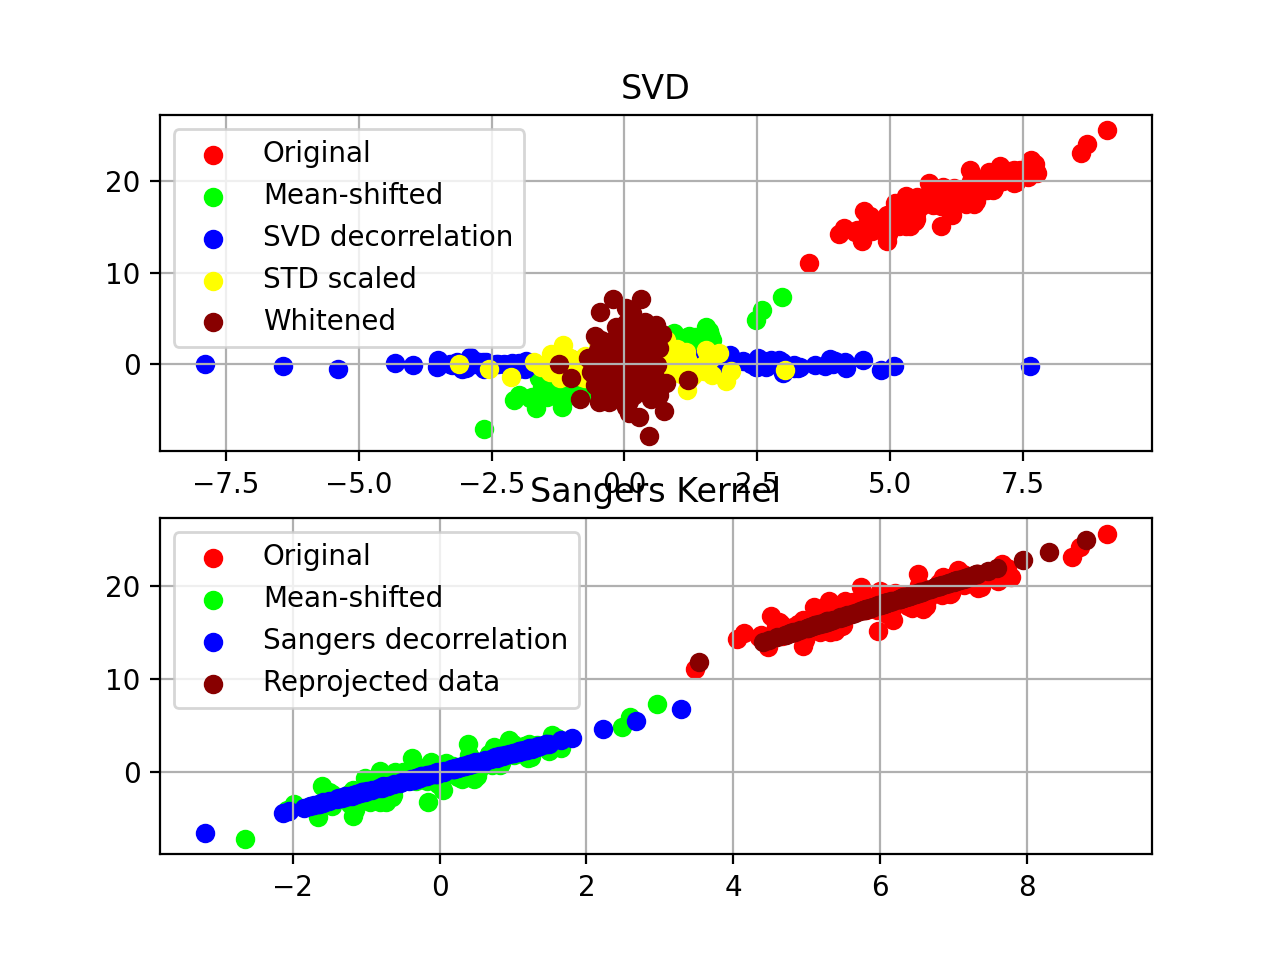

[0.39546495 2.75521928]


In [7]:
data_cpy = data.copy()

fig, ax = plt.subplots(2)
ax[0].scatter(data[...,0],data[...,1],c='#ff0000',label='Original')
data -= np.mean(data,axis=0)
ax[0].scatter(data[...,0],data[...,1],c='#00ff00',label='Mean-shifted')
data = np.dot(data,U)
ax[0].scatter(data[...,0],data[...,1],c='#0000ff',label='SVD decorrelation')
data1 = data.copy() / np.std(data,axis=0)
ax[0].scatter(data1[...,0],data1[...,1],c='#ffff00',label='STD scaled')
data /= S
print(np.std(data,axis=0))
ax[0].scatter(data[...,0],data[...,1],c='#880000',label='Whitened')
ax[0].set_title("SVD")
ax[0].legend()

data = data_cpy.copy()
ax[1].scatter(data[...,0],data[...,1],c='#ff0000',label='Original')
data -= np.mean(data,axis=0)
ax[1].scatter(data[...,0],data[...,1],c='#00ff00',label='Mean-shifted')
data = gha.forward(data)
ax[1].scatter(data[...,0],data[...,1],c='#0000ff',label='Sangers decorrelation')
#data *= np.std(data,axis=0)**2
#ax[1].scatter(data[...,0],data[...,1],c='#880000',label='Original')
data = gha.inverse(data) + np.mean(data_cpy,axis=0)
ax[1].scatter(data[...,0],data[...,1],c='#880000',label='Reprojected data')
ax[1].set_title("Sangers Kernel")
ax[1].legend()


ax[0].grid('on')
ax[1].grid('on')
fig.show()